# Исследование успешности игр

<h1>Содержание<span class='tocSkip'></span></h1>

* [1 Загрузка файла с данными, изучение общей информации](#my_section_1) <a id='content_1'></a>
  * [1.1 Изучение данных](#my_section_2) <a id='content_2'></a>
  * [1.2 Заключение](#my_section_3) <a id='content_3'></a>
* [2 Подготовка данных](#my_section_4) <a id='content_4'></a>
  * [2.1 Переименование, преобразование данных](#my_section_5) <a id='content_5'></a>
    * [2.1.1 Столбец year_of_release](#my_section_6) <a id='content_6'></a>
    * [2.1.2 Столбец user_score](#my_section_7) <a id='content_7'></a>
  * [2.2 Обработка пропусков, типов данных](#my_section_8) <a id='content_8'></a>
    * [2.2.1 Столбец name](#my_section_9) <a id='content_9'></a>
    * [2.2.2 Столбец critic_score](#my_section_10) <a id='content_10'></a>
    * [2.2.3 Оценочные параметры](#my_section_11) <a id='content_11'></a>
    * [2.2.4 Столбец rating](#my_section_12) <a id='content_12'></a>
    * [2.2.5 Обработка дубликатов](#my_section_13) <a id='content_13'></a>
  * [2.3 Подсчёт суммарных продаж](#my_section_14) <a id='content_14'></a>
  * [2.4 Заключение](#my_section_15) <a id='content_15'></a>
* [3 Исследовательский анализ данных](#my_section_16) <a id='content_16'></a>
  * [3.1 Оценка выпускаемости игр по годам](#my_section_17) <a id='content_17'></a>
  * [3.2 Изменения продаж по платформам](#my_section_18) <a id='content_18'></a>
  * [3.3 Актуальный период](#my_section_19) <a id='content_19'></a>
  * [3.4 Лидирующие по продажам платформы](#my_section_20) <a id='content_20'></a>
  * [3.5 Глобальные продажи игр](#my_section_21) <a id='content_21'></a>
  * [3.6 Влияние отзывов на популярность продуктов](#my_section_22) <a id='content_22'></a>
    * [3.6.1 Влияние на наиболее популярную платформу](#my_section_23) <a id='content_23'></a>
    * [3.6.2 Оценка влияния отзывов на продажи](#my_section_24) <a id='content_24'></a>
  * [3.7 Распределение игр по жанрам](#my_section_25) <a id='content_25'></a>
  * [3.8 Заключение](#my_section_26) <a id='content_26'></a>
* [4 Портрет пользователя каждого региона](#my_section_27) <a id='content_27'></a>
  * [4.1 Самые популярные платформы](#my_section_28) <a id='content_28'></a>
  * [4.2 Самые популярные жанры](#my_section_29) <a id='content_29'></a>
  * [4.3 Влияние рейтинга ESRB на продажи в регионах](#my_section_30) <a id='content_30'></a>
  * [4.4 Заключение](#my_section_31) <a id='content_31'></a>
* [5 Проверка гипотез](#my_section_32) <a id='content_32'></a>
  * [5.1 О равенстве рейтинга платформ Xbox One и PC](#my_section_33) <a id='content_33'></a>
  * [5.2 О равенстве рейтинга жанров Action и Sports](#my_section_34) <a id='content_34'></a>
  * [5.3 Заключение](#my_section_35) <a id='content_35'></a>
* [6 Общий вывод](#my_section_36) <a id='content_36'></a>

**Общая цель:** Сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цели исследования:** Выявить определяющие успешность игр закономерности.

**План работы:**
1. Провести выгрузку данных, изучить общую информацию
2. Обработать неточности, искажения, ошибки, подготовить данные
3. Провести исследовательский анализ данных
4. Составить портрет пользователя каждого региона 
5. Проверить гипотезы
6. Подготовить общий вывод

**Описание данных:** Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Представленны данные до 2016 года(данные за 2016 год могут быть неполными). 
*В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».*

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.











<a id='my_section_1'></a>
## [Загрузка файла с данными, изучение общей информации](#content_1)

Подключим необходимые модули и получим файл

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import numpy as np
from scipy import stats as sct

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('https:..')

<a id='my_section_2'></a>
### [Изучение данных](#content_2)
Используем основые инструменты для обзора данных 

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Проверим на явные дубликаты

In [6]:
data.duplicated().sum()

0

Проведём проверку на дубликаты по ключевым столбцам

In [7]:
data_dup_check = data
for el in ['Name', 'Platform', 'Year_of_Release']:
    try:
        data_dup_check[el] = data_dup_check[el].str.lower()
    except AttributeError:
        print("Возникла ошибка в столбце:", el)
        
data_dup_check.loc[:, ['Name', 'Platform', 'Year_of_Release']].duplicated().sum()

Возникла ошибка в столбце: Year_of_Release


2

*Обныружено 2 дубликата, обработаем их в следующей главе*

<a id='my_section_3'></a>
### [Заключение](#content_3)

**Вывод:** Обзор общей информации дал представление о необходимости:
1. Приведении символов в названии столбцов к одному регистру;
2. Изменении типов данных у столбцов:
 - Year_of_Release (Год выпуска лучше привести к целочисленному типу int);
 - User_Score (Нужно привести к типу float, так как представляет оценку пользователей);
3. Обработки пропусков у столбцов:
 - Name;
 - Year_of_Release;
 - Genre;
 - Critic_Score;
 - User_Score;
 - Rating.
4. Удалении дубликатов

<a id='my_section_4'></a>
## [Подготовка данных](#content_4)
В этой главе будет проведена работа по:
- обработке названий столбцов;
- изменению типов данных;
- обработке пропусков;
- подсчёту значений.

<a id='my_section_5'></a>
### [Переименование, преобразование данных](#content_5)

**Переименование столбцов**

In [8]:
data.columns = [el.lower() for el in data.columns]
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Преобразование типов данных столбцов**

<a id='my_section_6'></a>
#### [Столбец year_of_release](#content_6)

Проведём изменение типа столбца **`year_of_release`**. Посмотрим список уникальных значений.

In [9]:
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [10]:
data.loc[data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


*В столбце имеются пропуски, значения имеют тип данных float64. Общее количество пропусков достаточно мало `269`, часть игр из представленных имеют в названии дату, близкую к выходу, кроме того, информацию о них достаточно легко найти в интернете. Поэтому, предположительно, пропуски в данных, скорее всего носят технический характер.*

Изменить тип данных с пропусками просто так не выйдет. Обозначим пропущенные значения как `-1`.

In [11]:
data['year_of_release'] = data['year_of_release'].fillna(-1).astype('int64')

<a id='my_section_7'></a>
#### [Столбец user_score](#content_7)

Проведём изменение типа столбца **`user_score`**. Посмотрим список уникальных значений.

In [12]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [13]:
data.loc[data['user_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,gb,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,snes,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,ds,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,gb,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,nes,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


*Обнаружены пропуски и строчное значение **`tbd`**.*

**`tbd`** - To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.

**`nan`** - Отсутствие значений, может быть вызвано, либо ошибкой, либо отсутствием информации по игре, возможно, стоит поискать другой источник информации для формирования значений.

По факту, что для `tbd`, что для `nan` значений нет. Будем использовать `-1` как общее обозначение пропуска.
*В нашем случае рейтинг не может быть отрицательный и варируется по шкале от 0 до 10.*

Проведём замену значений.

In [14]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1
data['user_score'] = data['user_score'].fillna(-1).astype('float')

Изучим, как изменилась таблица.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


*Обновление успешно*

<a id='my_section_8'></a>
### [Обработка пропусков, типов данных](#content_8)
Еще раз обратим внимание на столбцы с пропусками

In [16]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16, grid=True, xlabel='% пропущенных значений')
            .set_title('Пропущенные значения' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

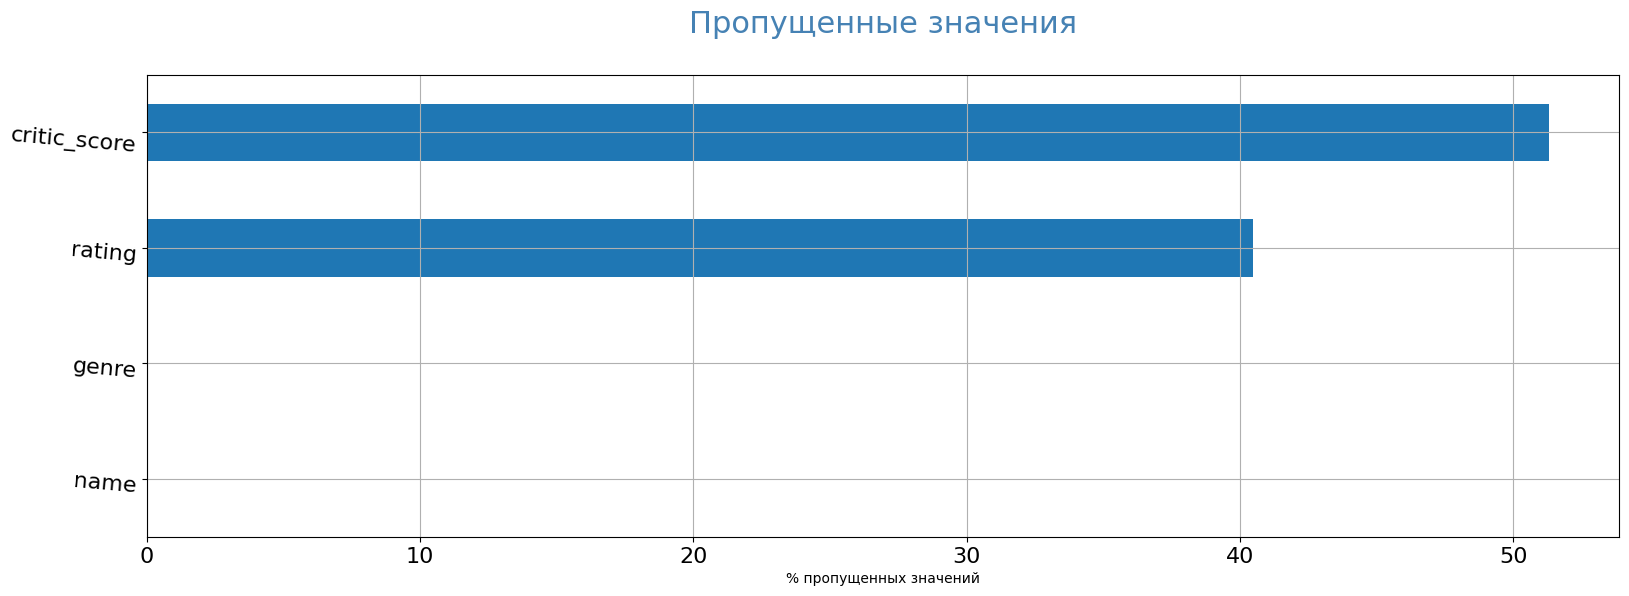

In [17]:
pass_value_barh(data)

In [18]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score            0
rating             6766
dtype: int64

*Пропуски имеются в столбцах:*
- `name`;
- `genre`;
- `critic_score`;
- `rating`. 

<a id='my_section_9'></a>
#### [Столбец name](#content_9)

Проведём оценку

In [19]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,-1.0,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,-1.0,NaN


Странно, есть информация о продажах, годе выпука, но нет информации о названии и жанре, тут точно ошибка. Столбцы `name` и `genre` имеют пропуски в одних и тех же строчках. Удалим строки, игры старые, имеют мало продаж. 

In [20]:
data = data.drop(data.loc[data['name'].isna()].index)

<a id='my_section_10'></a>
#### [Столбец critic_score](#content_10)
Проведём оценку значений стобца

In [21]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [22]:
data.loc[data['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN
5,tetris,gb,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,NaN
9,duck hunt,nes,1984,Shooter,26.93,0.63,0.28,0.47,NaN,-1.0,NaN
10,nintendogs,ds,2005,Simulation,9.05,10.95,1.93,2.74,NaN,-1.0,NaN


Проверим, соответствуют ли пропуски в `critic_score` столбцу `user_score`. Отфильтруем значения в соответствии с преобразованием.

In [23]:
data.loc[(data['critic_score'].isna()) & (data['user_score'] == -1)].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN
5,tetris,gb,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,NaN
9,duck hunt,nes,1984,Shooter,26.93,0.63,0.28,0.47,NaN,-1.0,NaN
10,nintendogs,ds,2005,Simulation,9.05,10.95,1.93,2.74,NaN,-1.0,NaN


Вероятно, что пропуск в `critic_score` вызван теми же причинами, что и пропуска в `user_score`:
- информация еще не определена или решение по вопросу не принято;
- техническая ошибка;
- отсутствие информации по игре.

Так как данные получены из открытых источников, то стоит пересмотреть их, выбрать другие или дополнить информацию, вероятно, что такое количество пропусков в одних и тех же местах, обусловлены пропуском значении в одном и том же месте получении информации. 

Используем `-1` как значение для замены `nan`. 

In [24]:
data['critic_score'] = data['critic_score'].fillna(-1)

<a id='my_section_11'></a>
#### [Оценочные параметры](#content_11)

Отдельно стоит братить внимание на столбцы `user_score` и `critic_score`. Столбец `critic_score`, хоть и имеет тип float64, но имеет целочисленную оценку. Преобразование `user_score` к 100 бальной системе рейтинга упростит восприятие и не исказит данные.

In [25]:
data.loc[data['user_score'] != -1, 'user_score'] =\
data.loc[data['user_score'] != -1, 'user_score'] * 10

<a id='my_section_12'></a>
#### [Столбец rating](#content_12)

Проведём оценку значений в столбце rating

In [26]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Кроме пропусков в столбце находяться разные категории.
Проведём расшифровку данных ESRB:
1. AO («Adults Only 18+») — «Только для взрослых»;
2. E («Everyone») — «Для всех»;
3. E10+ («Everyone 10 and older») — «Для всех старше 10 лет»;
4. EC («Early childhood») — «Для детей младшего возраста»;
5. K-A («for Kids to Adults») - «Игры, содержащие контент, подходящий для широкой аудитории»;
6. M («Mature») — «От 17 лет»;
7. RP ( «Rating Pending»») — «Рейтинг ожидается»;
8. T («Teen») — «Подросткам 13—19 лет».

Проверим столбцы `rating`, `critic_score`, `user_score` на идентичность пропусков.

In [27]:
data.loc[(data['critic_score'] == -1) & (data['user_score'] == -1)\
         & (data['rating'].isna())].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
5,tetris,gb,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN
9,duck hunt,nes,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN
10,nintendogs,ds,2005,Simulation,9.05,10.95,1.93,2.74,-1.0,-1.0,NaN
12,pokemon gold/pokemon silver,gb,1999,Role-Playing,9.00,6.18,7.20,0.71,-1.0,-1.0,NaN
18,super mario world,snes,1990,Platform,12.78,3.75,3.54,0.55,-1.0,-1.0,NaN
20,pokemon diamond/pokemon pearl,ds,2006,Role-Playing,6.38,4.46,6.04,1.36,-1.0,-1.0,NaN
21,super mario land,gb,1989,Platform,10.83,2.71,4.18,0.42,-1.0,-1.0,NaN
22,super mario bros. 3,nes,1988,Platform,9.54,3.44,3.84,0.46,-1.0,-1.0,NaN


*Столбцы с пропусками в основном идентичны, информация, либо отсутствует в исходнике, либо произошла ошибка при получении данных. Стоит обрать внимание технического отдела.*

Проведём заполнение пропусков в столбце строковым значением `'unknown'` – неизвестный.

In [28]:
data['rating'] = data['rating'].fillna('unknown')

<a id='my_section_13'></a>
#### [Обработка дубликатов](#content_13)

Оценим набор данных на количество строк

In [29]:
data.shape[0]

16713

Для поиска дубликатов, приведём к нижнему регистру значения в ключевых столбцах

In [30]:
for el in ['name', 'platform', 'year_of_release']:
    try:
        data[el] = data[el].str.lower()
    except AttributeError:
        print("Возникла ошибка в столбце:", el)

Возникла ошибка в столбце: year_of_release


Обработаем дубликаты методом `drop_duplicates`

In [31]:
data = data.drop_duplicates(subset = ['name', 'platform', 'year_of_release'])

In [32]:
data.shape[0]

16712

*Дубликаты удалены*

<a id='my_section_14'></a>
### [Подсчёт суммарных продаж](#content_14)

Необходимо посчитайть суммарные продажи во всех регионах и записать их в отдельный столбец. Воспользуемся методом `apply`.

In [33]:
def all_sales(row):
    count = row['na_sales']\
    + row['eu_sales']\
    + row['jp_sales']\
    + row['other_sales']
    return count

In [34]:
data['all_sales'] = data.apply(all_sales, axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


*Столбец добавлен, значения записаны*

<a id='my_section_15'></a>
### [Заключение](#content_15)

Убедимся в успехе проделанной работы, вызовем общую информацию о таблице.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  float64
 9   user_score       16712 non-null  float64
 10  rating           16712 non-null  object 
 11  all_sales        16712 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


**Вывод:** В работе были осуществлены действия для подготовки данных:
1. Переименование столбцов, приведение символов к нижнему регистру;
2. Преобразовние типов данных столбцов:
 - year_of_release к 'int64';
 - user_score к 'float64'.
3. Обработка пропусков в столбцах:
 - Name;
 - Year_of_Release;
 - Genre;
 - Critic_Score;
 - User_Score;
 - Rating.
4. Перевод колонки `user_score` из 10 бальной системы к 100 бальной.
5. Удалены дубликаты.
5. Создание колонки `all_sales` с суммарными продажами регионов:
 - na_sales;
 - eu_sales;
 - jp_sales;
 - other_sales.
 
Выполненные действия позволяют проводить исследовательский анализ данных.

<a id='my_section_16'></a>
## [Исследовательский анализ данных](#content_16)

Для решения задач исследования:
- оценим ситуацию на рынке игр, посмотрим, сколько игр выпускалось в разные года и на разных платформах; 
- изучим повяление и исчезновение платформ, попробуем оценить характерный срок изменчивости;
- определим актуальный период для построение прогноза на 2017 год; 
- соотнесём показатели игр с отзывами; 
- выделим наиболее популярные жанры.

<a id='my_section_17'></a>
### [Оценка выпускаемости игр по годам](#content_17)

Построим график распределения выпуска игр по годам типа `bar` для визуальной оценки. Попробуем определить "важны ли данные за все периоды?".

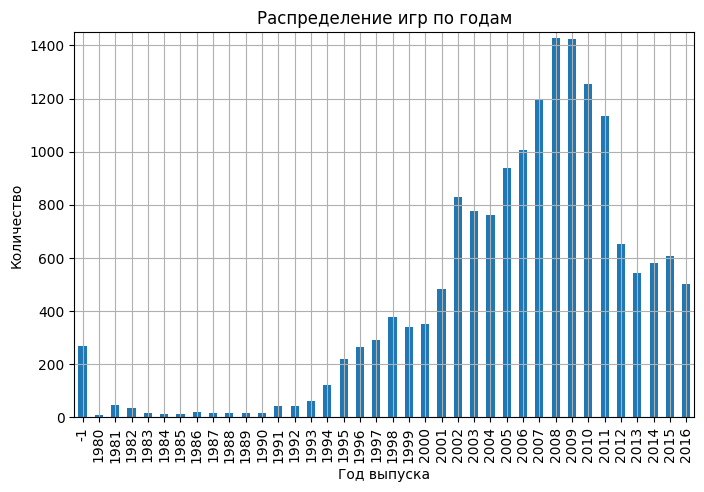

In [36]:
data.groupby('year_of_release')['name'].count().reset_index()\
.plot('year_of_release', kind='bar', figsize=(8, 5), ylim=(0, 1450),
      legend = 0, grid=True, title='Распределение игр по годам',
     xlabel = 'Год выпуска', ylabel = 'Количество');

Попробуем отсечь минимум, используя математические методы. Гипотетически, минимум можно определить по диаграмме размаха. Этот минимум будет свидетельствовать о начале роста компьютерной индустрии ("Спрос рождает предложение").

In [37]:
desc = data.groupby('year_of_release')['name'].count()
desc.describe()

count      38.000000
mean      439.789474
std       446.355037
min         9.000000
25%        37.250000
50%       313.500000
75%       734.500000
max      1427.000000
Name: name, dtype: float64

*На основе полученного результата сложно дать какие-то прогнозы.*

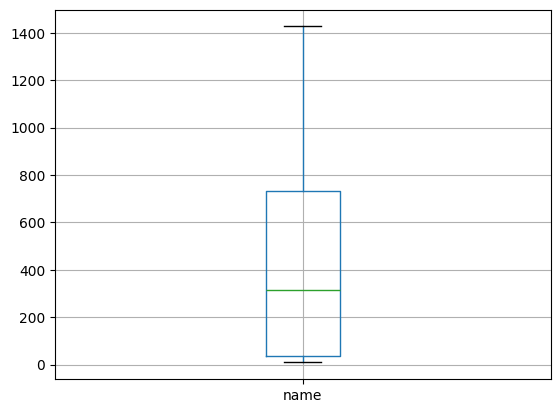

In [38]:
data.groupby('year_of_release')['name'].count().reset_index().boxplot('name');

**Вывод:** если оценивать данные по диаграмме размаха и графику, то можно утверждать, что наиболее удачное значение для выбора периодов, являются года, где игр было выпущено в районе 313. Однако, по мере развития компьютерной индустрии менялась не только мода, но и техническое оснащение игровых машин пользователей. Стоит обратить внимание на пик игр выпущенных в 2001 году, выборка значений достаточно большая, а значит, что пользователи должны распределиться наиболее конкретно по играм и по жанрам. В связи с тем, что культовые игры выходят не каждый год и в некотором смысле являются выбросами, то достаточно большой охват, начиная с 2001-2016 год позволит выделить наиболее удачные зависимости. Игры с 2001-2016 год составляют 84.5 % от выборки. Однако для более полного прогнозирования стоит получить зависимости продаж конкретных игр.

<a id='my_section_18'></a>
### [Изменения продаж по платформам](#content_18)

Нужно узнать за какой характерный срок появляются новые и исчезают старые платформы? Построим график распределения суммарных продаж по платформам.

<Axes: title={'center': 'Суммарные продажи'}, xlabel='Платформа', ylabel='Продажи'>

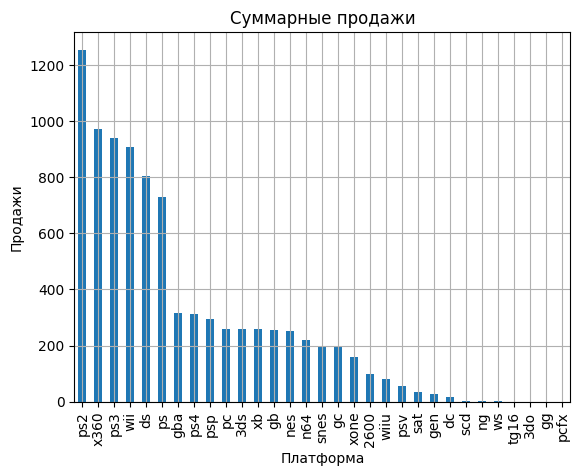

In [39]:
data.groupby('platform')['all_sales'].sum().sort_values(ascending=False)\
.plot(kind = 'bar', title = 'Суммарные продажи', xlabel='Платформа', ylabel='Продажи', grid='on')

*Возьмём для оценки характерного срока появления новых и исчезновения старх платформ 1/3 значений из списка.*

Выберем десять платформ с наибольшими суммарными продажами и построим распределение по годам. Попробуем определить за какой характерный срок появляются новые и исчезают старые платформы.

In [40]:
top = data.groupby('platform')['all_sales'].sum().sort_values(ascending=False).reset_index()['platform']
top_platform = list(top[0:10])
top_platform

['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'gba', 'ps4', 'psp', 'pc']

*Определили 10 платформ с наибольшими суммарными продажами*

**Визуализация данных**

Напишем функцию для поcтроения графиков рядом.

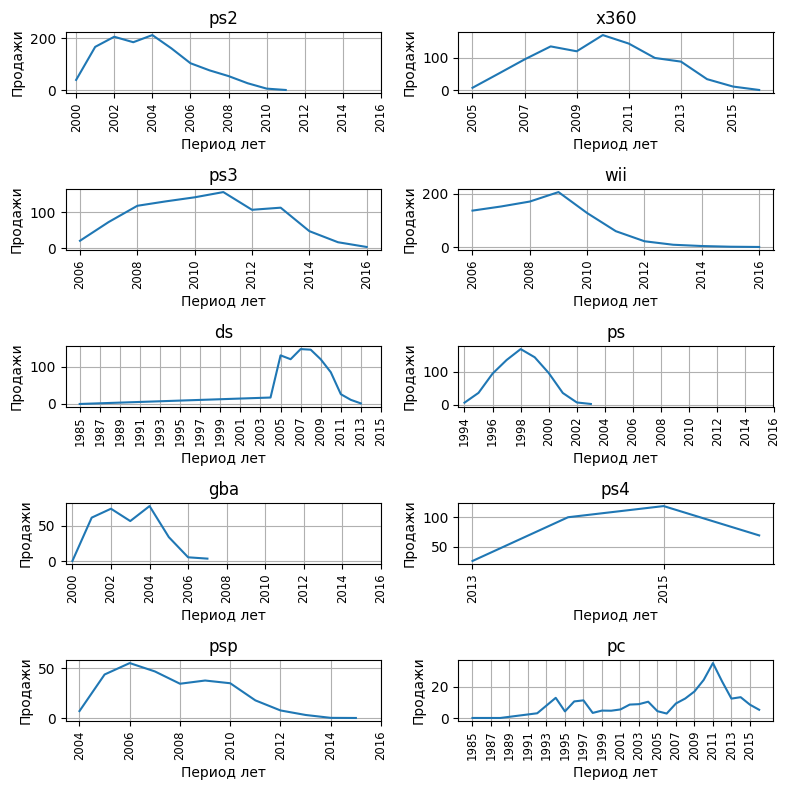

In [41]:
def sub_platforms(top_platform, step = 2., a=8, b=8, degree = 0):
    fig, ax = plt.subplots(5, 2, figsize=(a, b)) 
    ax1, ax2 = 0, 0 
    for el in top_platform:
        fig1 = data.query('year_of_release != -1 and platform == @el')\
        .pivot_table(index=['year_of_release', 'platform'], values='all_sales', aggfunc='sum')\
        .reset_index() # Фильтруем и оставляем значения  конкретной платформы распределенные по годам  
        
        ax[ax1][ax2].plot(fig1['year_of_release'], fig1['all_sales']) #Строим график по координатам
        ax[ax1][ax2].tick_params('x', labelsize = 'small', labelrotation = degree) 
        ax[ax1][ax2].grid() # Включаем сетку
        ax[ax1][ax2].set_xlabel('Период лет') # Подписываем ось x
        ax[ax1][ax2].set_ylabel('Продажи') # Подписываем ось y
        ax[ax1][ax2].set_title(el) # Устанавливаем название графика
        ax[ax1][ax2].xaxis.set_ticks(np.arange(fig1['year_of_release'][0], 2016.1, step))
         
        if ax2 == 1: # Условие для распределения графиков по ячейкам
            ax2 = 0
            ax1 += 1
        else:
            ax2 += 1
    
    plt.tight_layout() # метод для показа названия значений по оси x
    plt.show()
    
sub_platforms(top_platform, degree = 90)    

Напишем функцию для построения графиков на одном рисунке для лучшей наглядности.

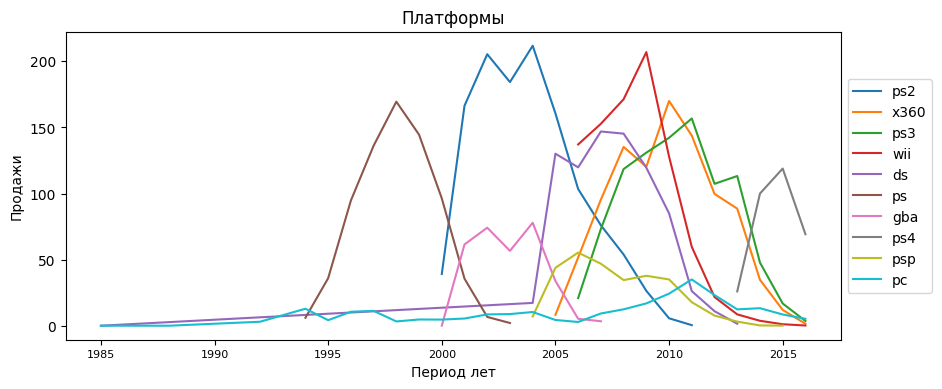

In [42]:
def sub_platforms_total():
    fig, ax = plt.subplots(1, 1, figsize=(10, 4)) 
    for el in top_platform:
        fig1 = data.query('year_of_release != -1 and platform == @el')\
        .pivot_table(index=['year_of_release', 'platform'], values='all_sales', aggfunc='sum')\
        .reset_index() # Фильтруем и оставляем значения  конкретной платформы распределенные по годам  
    
        ax.plot(fig1['year_of_release'], fig1['all_sales']) #Строим график по координатам
        ax.tick_params('x', labelsize=8) # Устанавливаем размер названия подписи по оси x
        ax.grid() # Включаем сетку
        ax.set_xlabel('Период лет') # Подписываем ось x
        ax.set_ylabel('Продажи') # Подписываем ось y
    plt.title(label='Платформы')
    plt.legend(top_platform, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
sub_platforms_total()    

**Количественный рассчёт**

Оценим даты, когда платформы были запущены и даты, когда продажи совсем упали. 

In [43]:
def creating_data_plt():
    plt_name = []
    plt_st_y = []
    plt_f_y = []
    plt_dif = [] 
    for el in top_platform: # Перебор топ 10 платформ
        plt_sort = data.query('year_of_release != -1 and platform == @el')\
        .pivot_table(index=['year_of_release', 'platform'], values='all_sales', aggfunc='sum')\
        .reset_index() # Группировка и фильтрация значений

        plt_st = plt_sort['year_of_release'][0]
        plt_f = plt_sort['year_of_release'][plt_sort['year_of_release'].index[-1]]
        plt_name.append(el)
        plt_st_y.append(plt_st)
        plt_f_y.append(plt_f)
        plt_dif.append(plt_f - plt_st)
    plt_st_f_info = {'platform': plt_name, 'launch': plt_st_y, 'ending': plt_f_y, 'difference': plt_dif}     
    return pd.DataFrame(data=plt_st_f_info) # Создание датафрейма

   
plt_st_f_info = creating_data_plt()

In [44]:
plt_st_f_info

,platform,launch,ending,difference
0,ps2,2000,2011,11
1,x360,2005,2016,11
2,ps3,2006,2016,10
3,wii,2006,2016,10
4,ds,1985,2013,28
5,ps,1994,2003,9
6,gba,2000,2007,7
7,ps4,2013,2016,3
8,psp,2004,2015,11
9,pc,1985,2016,31


Оценим периоды запуска новых платформ

In [45]:
plt_st_f_info.loc[:, ['platform', 'launch']].sort_values(by='launch').reset_index(drop=True) 

,platform,launch
0,ds,1985
1,pc,1985
2,ps,1994
3,ps2,2000
4,gba,2000
5,psp,2004
6,x360,2005
7,ps3,2006
8,wii,2006
9,ps4,2013


Проведём рассчёт среднего характерного срока появления новых платформ.

In [46]:
def platforms_stat(plt_year):
    count = []
    score_launch = plt_st_f_info[plt_year].value_counts().index.sort_values() # Список сортированных годов запуска платформ
    for i in range(len(score_launch) - 1): 
        count.append(abs(score_launch[i] - score_launch[i+1])) # Подсчёт разницы лет между платформами
    result = sum(count)/(len(score_launch) - 1) # Рассчёт среднего
    print('Среднее знаачение:', result)
    print('Медиана:', st.median(count))
    
platforms_stat('launch')    

Среднее знаачение: 4.666666666666667
Медиана: 5.0


Оценим периоды упадка продаж на платформах

In [47]:
plt_st_f_info.loc[:, ['platform', 'ending']].sort_values(by='ending').reset_index(drop=True)

,platform,ending
0,ps,2003
1,gba,2007
2,ps2,2011
3,ds,2013
4,psp,2015
5,x360,2016
6,ps3,2016
7,wii,2016
8,ps4,2016
9,pc,2016


Проведём рассчёт среднего характерного срока исчезновения платформ.

In [48]:
platforms_stat('ending')  

Среднее знаачение: 2.6
Медиана: 2


Оценим среднюю продолжительность существования одной платформы.

In [49]:
print(f'Медиана существования одной платформы: {plt_st_f_info["difference"].median()} лет')
print(f'Среднее существования одной платформы: {plt_st_f_info["difference"].mean()} года')

Медиана существования одной платформы: 10.5 лет
Среднее существования одной платформы: 13.1 года


**Обобщение**

Проведём общую визуализацию данных по появлению и исчезновению платформ.

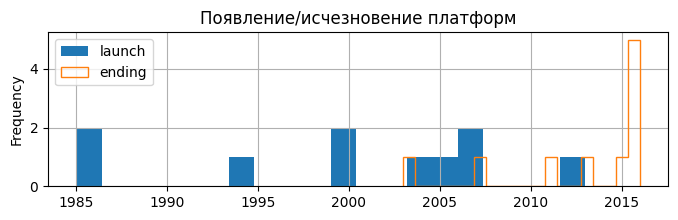

In [50]:
ax = plt_st_f_info.plot(y='launch', kind = 'hist', histtype='stepfilled', bins=(20), figsize=(8,2), label='launch')  
plt_st_f_info['ending']\
.plot(y='ending', kind = 'hist',histtype='step', bins=(20), figsize=(8,2),ax=ax, title = 'Появление/исчезновение платформ',
     grid=True, legend=True);


**Вывод:** Средний срок появления и исчезновение  популярных платформ можно оценить в 5 и 2 года соответственно. Время существования одной платформы может варироваться от 3 до 31 года, медианной же время существования равно 10.5 лет. Также можно сделать вывод, судя по графикам, что в большинстве случаев падение продаж платформы начинается после прохождения половины жизненного цикла.

<a id='my_section_19'></a>
### [Актуальный период](#content_19)

Учитывая, что среднее время сущестование платформы около 10.5 лет, а пик популярности приходится примерно на половину, можно выбрать 2014-2016 года.

In [51]:
data = data.query('2014 <= year_of_release <= 2016')

<a id='my_section_20'></a>
### [Лидирующие по продажам платформы](#content_20)

Определим платформы, оставшиеся в выбранном периоде.

In [52]:
data['platform'].unique()

array(['ps4', '3ds', 'xone', 'wiiu', 'ps3', 'x360', 'pc', 'wii', 'psv',
       'psp'], dtype=object)

Визуализируем информацию по продажам для платформ. Определим у каких платформ продажи растут, а у каких падают и какие лидируют. Используем функцию из пункта 3.2

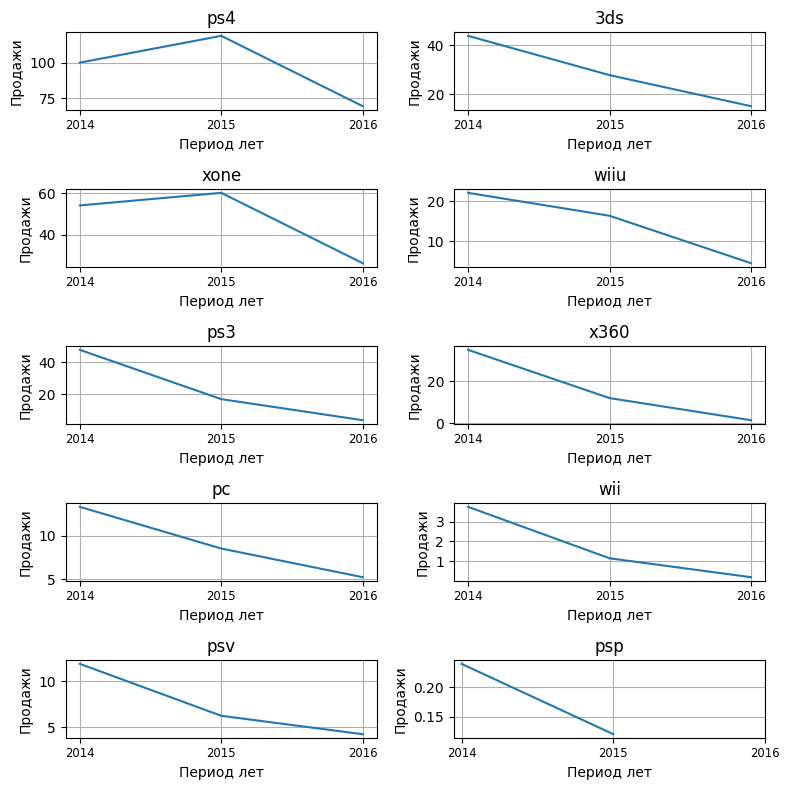

In [53]:
top_platform = data['platform'].unique()
sub_platforms(top_platform, step = 1.)

*У всех платформ наблюдается падение продаж.*

Отразим продажи для платформ за выбранный период.

In [54]:
top_platform = data.pivot_table(index=['platform'], values='all_sales', aggfunc='sum')\
.sort_values(by='all_sales', ascending=False)
top_platform

,all_sales
platform,
ps4,288.15
xone,140.36
3ds,86.68
ps3,68.18
x360,48.22
wiiu,42.98
pc,27.05
psv,22.40
wii,5.07


Сделаем вывод информации за последний год

In [55]:
data.query('year_of_release == 2016')\
          .pivot_table(index=['platform'], values='all_sales', aggfunc='sum')['all_sales']\
        .sort_values(ascending=False)

platform
ps4     69.25
xone    26.15
3ds     15.14
pc       5.25
wiiu     4.60
psv      4.25
ps3      3.60
x360     1.52
wii      0.18
Name: all_sales, dtype: float64

**Вывод:** Наиболее стабильными платформами и потенциально прибыльными, находящимися в лидерах по продажам являются: `PS4`,`XOne`,`3DS`, `PC`, `WiiU`. У всех платформ наблюдается спад по продажам c 2014-2015 год, за 2016 год однозначно сказать нельзя, данные, вероятно не полные.

<a id='my_section_21'></a>
### [Глобальные продажи игр](#content_21)

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

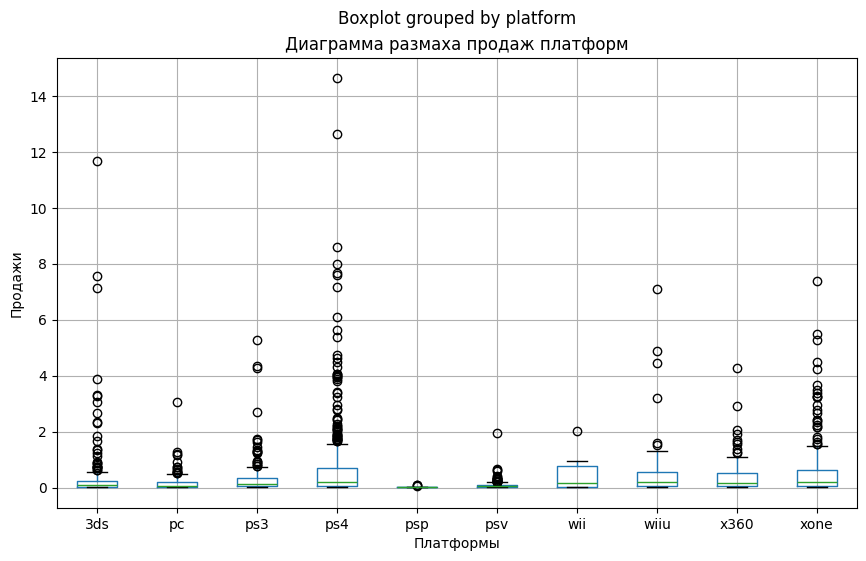

In [56]:
fig, ax = plt.subplots(figsize=(10,6))
data.boxplot(column='all_sales', by='platform', ax=ax)
ax.set_xlabel('Платформы')
ax.set_ylabel('Продажи')
ax.set_title('Диаграмма размаха продаж платформ')
plt.show()

Масштабируем для большей наглядности

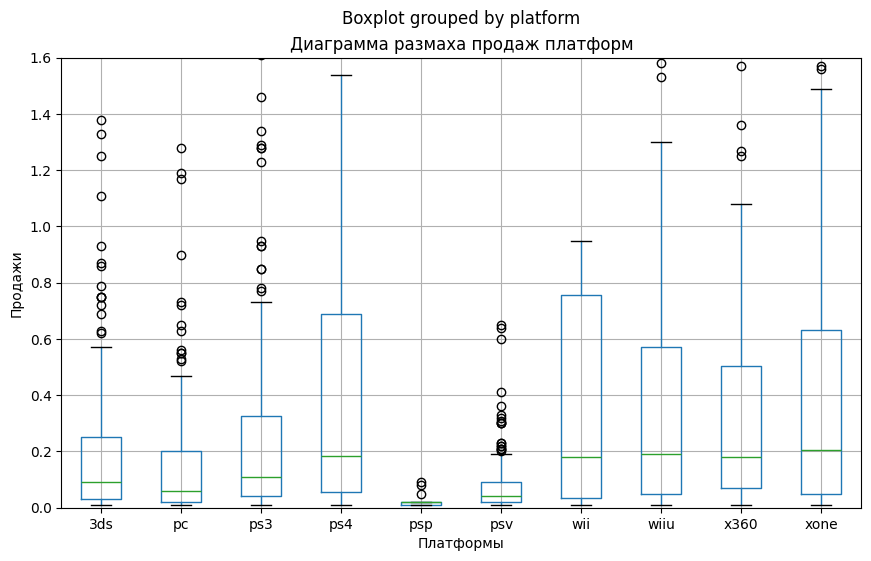

In [57]:
fig, ax = plt.subplots(figsize=(10,6))
data.boxplot(column='all_sales', by='platform', ax=ax)
ax.set_ylim(0,1.6)
ax.set_xlabel('Платформы')
ax.set_ylabel('Продажи')
ax.set_title('Диаграмма размаха продаж платформ')
plt.show()

*Определим нижние значения для диаграмм размаха.*

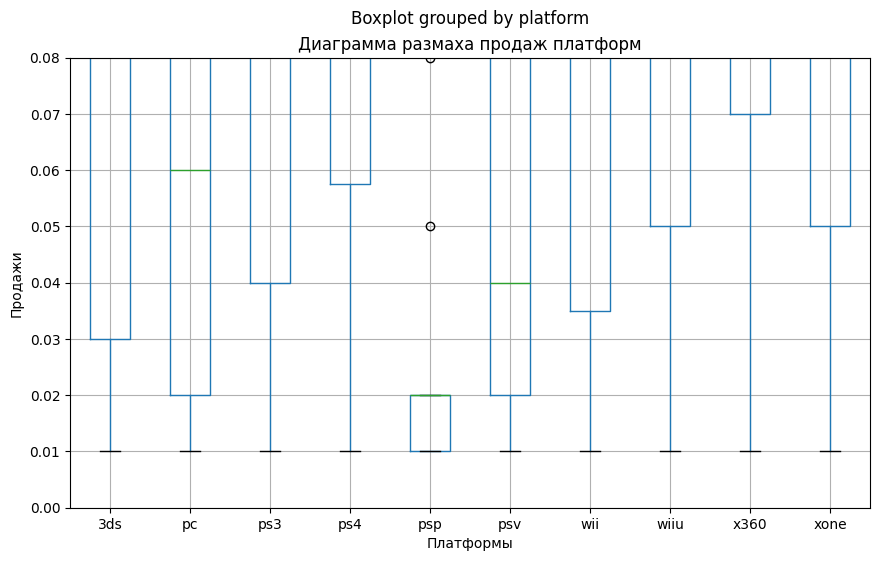

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
data.boxplot(column='all_sales', by='platform', ax=ax)
ax.set_ylim(0,0.08)
ax.set_xlabel('Платформы')
ax.set_ylabel('Продажи')
ax.set_title('Диаграмма размаха продаж платформ')
plt.show()


**Вывод**: На графиках наблюдается множество выбросов, характеризующие наиболее успешные игры. Из платформ можно выделить, те, где игры лучше всего продаются, оценим верхние значения диаграмм. Лидирующие платформы, где много популярных игр:
1. Wii;
2. PS4;
3. XOne;
4. WiiU

Оценим диаграммы по нижней границе, где минимальное количество купленных игр наиболее высокое:
1. X360;
2. PS4;
3. XOne;
4. WiiU.

Если сравнивать значения из пункта 3.4 и рассматривать топ 3, то заметно, что выделяются `PS4` и `XOne`, как лидеры, а платформа `3DS`, судя по графику, не набирает большого количества продаж в общей массе, что заставляет предположить, что она набирает продажи за счёт культовых игр. В качествве альтернативной платформы можно рассмотреть `WiiU`, как ниболее стабильную, а `3DS` стоит рассматривать с рассчётом на рекламные кампании для популярных игр.  

<a id='my_section_22'></a>
### [Влияние отзывов на популярность продуктов](#content_22)

<a id='my_section_23'></a>
#### [Влияние на наиболее популярную платформу](#content_23)

Из результатов анализа можно выделить `PS4` как наиболее популярную платформу. Оценим для нёё влияние отзывов на продукт.

In [59]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'all_sales'],
      dtype='object')

Произведём отсев пропусков, заполненных отрицательным значением.

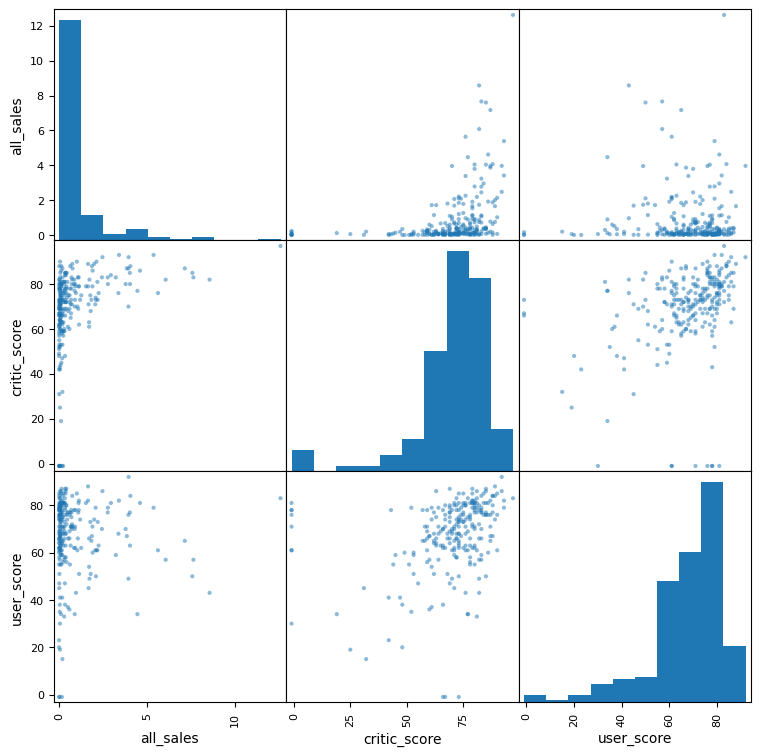

In [60]:
reviews_data = data.query('(critic_score >= 0 or user_score >= 0)')\
.loc[data['platform']=='ps4', ['platform', 'all_sales', 'critic_score', 'user_score']]
pd.plotting.scatter_matrix(reviews_data, figsize=(9,9));

In [61]:
reviews_data.drop('platform', axis=1).corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.339554,-0.007966
critic_score,0.339554,1.000000,0.331745
user_score,-0.007966,0.331745,1.000000


**Вывод:** Наблюдается практически отсутствие корреляции(`-0.008`) между отзывами пользователей(`user_score`) и продажами(`all_sales`), а вот между отзывами критиков(`critic_score`) и теми же продажами(`all_sales`) она уже положительная и гораздо больше(`0.34`). Существует корреляция, между отзывами критиков и пользователей равный `0.3`, что свидетельствует о схожести взглядов профессионалов и обычных пользователей.

<a id='my_section_24'></a>
#### [Оценка влияния отзывов на продажи](#content_24)

Рассмотрим как в общем влияют отзывы для всех платформ.

In [62]:
reviews_data1 = data.query('critic_score >= 0 and user_score >= 0')\
.loc[:, ['platform', 'all_sales', 'critic_score', 'user_score']]\
.groupby('platform').corr()
reviews_data1 = reviews_data1.loc[reviews_data1['all_sales'] < 1]
reviews_data1

all_sales  critic_score  user_score
platform                                                  
3ds      critic_score   0.284686      1.000000    0.862485
         user_score     0.279850      0.862485    1.000000
pc       critic_score   0.172061      1.000000    0.466099
         user_score    -0.089974      0.466099    1.000000
ps3      critic_score   0.446575      1.000000    0.693445
         user_score     0.156595      0.693445    1.000000
ps4      critic_score   0.401903      1.000000    0.546434
         user_score    -0.043186      0.546434    1.000000
psv      critic_score   0.041029      1.000000    0.524066
         user_score     0.023528      0.524066    1.000000
wiiu     critic_score   0.375640      1.000000    0.763536
         user_score     0.411451      0.763536    1.000000
x360     critic_score   0.525723      1.000000    0.625309
         user_score     0.336514      0.625309    1.000000
xone     critic_score   0.422112      1.000000    0.440977
         user_score    -0.091734      0.440977    1.000000

In [63]:
rel = data.query('critic_score >= 0 and user_score >= 0')\
.loc[:, ['platform', 'all_sales', 'critic_score', 'user_score']]

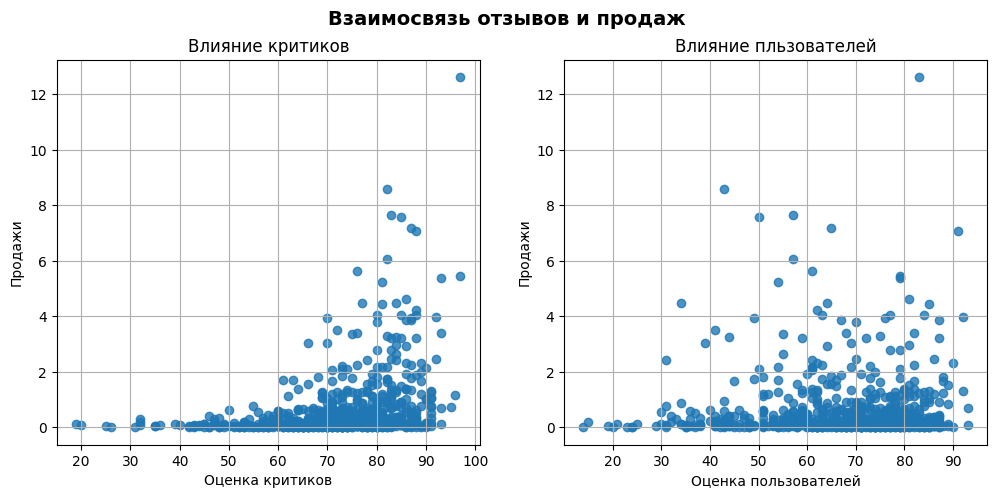

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5));
fig.suptitle('Взаимосвязь отзывов и продаж', fontsize=14, fontweight='bold');
ax[0].scatter(x=rel['critic_score'], y=rel['all_sales'], alpha=0.8); 
ax[0].set_title('Влияние критиков');
ax[0].grid();
ax[0].set_xlabel('Оценка критиков');
ax[0].set_ylabel('Продажи');

ax[1].scatter(x=rel['user_score'], y=rel['all_sales'], alpha=0.8);
ax[1].set_title('Влияние пльзователей');
ax[1].grid();
ax[1].set_xlabel('Оценка пользователей');
ax[1].set_ylabel('Продажи');

In [65]:
reviews_data1.reset_index().pivot_table(index='level_1', values='all_sales', aggfunc=['mean', 'median'])

,mean,median
,all_sales,all_sales
level_1,,
critic_score,0.333716,0.388772
user_score,0.122881,0.090062


**Вывод**: корреляция продаж с оценкой `критиков` гораздо более заметна, чем корреляция с отзывами пользователей. Если рассматривать интересующие нас платформы, то значение медианы(`0.39`) близко к истине, где корреляция для платформ равна:
1. PS4 – 0.4;
2. XOne – 0.42;
3. 3DS – 0.28;
4. PC – 0.17;
5. WiiU – 0.38.


Корреляция продаж с оценкой `пользователей` не так однозначна. Для платформы `WiiU` влияние отзывов пользователей(`0.41`) более заметно, чем критиков(`0.38`). `3DS` имеет примерно одинаковые значения. Остальные платформы более-менее придерживаются значения медианы (`0.09`):
1. PS4 – -0.04;
2. XOne – -0.09.
3. 3DS – 0.28;
4. PC – -0.09;
5. WiiU – 0.41.


Нельзя однозначно сказать, что влияние отзывов сказывается на продажах. Зависиость между этими характеристиками может быть обусловлена неведомыми для нас факторами. Однако, стоит обратить внимание на то, что она есть и в своём пике для интересующих нас платформ может достигать значения `0.42`.

<a id='my_section_25'></a>
### [Распределение игр по жанрам](#content_25)

Оценим общее распределение игр по жанрам.

In [66]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'all_sales'],
      dtype='object')

In [67]:
data['genre'].value_counts()

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: count, dtype: int64

Сильнее остальных выделяется жанр 'Action', далее по убывающей, среди всех выделим 5 самых популярных.

In [68]:
top5 = data['genre'].value_counts()[0:5]
top5

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Name: count, dtype: int64

**Выделим жанры с высокими и низкими продажами**

Используем метод `pivot_table` для группировке значений по жанру `genre`, рассчитаем для него значения продаж, проведём сортировку по медиане и сравним полученные результаты.

In [69]:
data_genre = data.pivot_table(index='genre', values='all_sales', aggfunc=['sum', 'count', 'mean', 'median'])
data_genre.columns = ['sum_sales', 'count_sales', 'mean_sales', 'median_sales']
data_genre.sort_values(by='median_sales', ascending=False)

,sum_sales,count_sales,mean_sales,median_sales
genre,,,,
Shooter,170.94,128,1.335469,0.515
Sports,109.48,161,0.680000,0.180
Platform,18.09,38,0.476053,0.140
Fighting,28.22,60,0.470333,0.125
Role-Playing,101.44,221,0.459005,0.110
Simulation,13.13,44,0.298409,0.100
Action,199.36,619,0.322068,0.090
Misc,37.55,113,0.332301,0.090
Racing,27.52,69,0.398841,0.090


Оценим на диаграмме размаха каждую платформу и определим более длинный ряд успешно продающихся игр.
Построим график в полном масштабе.

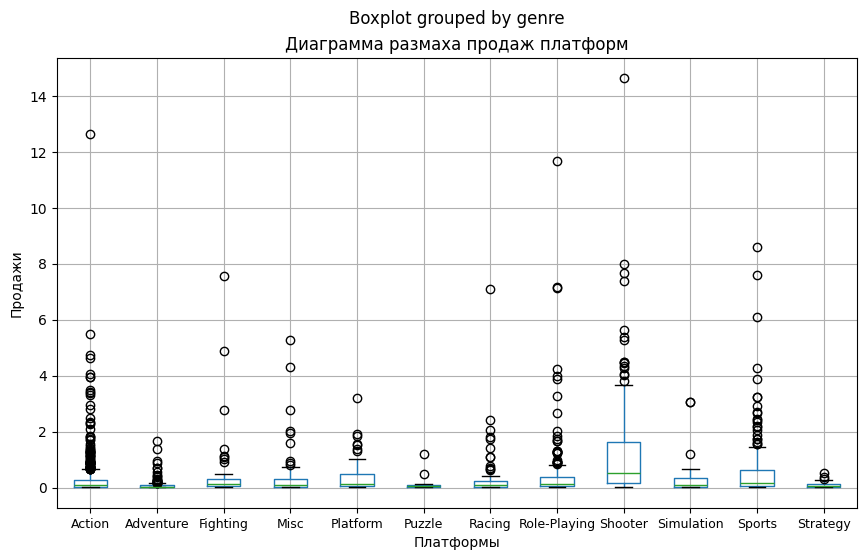

In [70]:
fig, ax = plt.subplots(figsize=(10,6))
data.boxplot(column='all_sales', by='genre', ax=ax)
ax.set_ylim()
ax.set_xlabel('Платформы')
ax.set_ylabel('Продажи')
ax.set_title('Диаграмма размаха продаж платформ')
ax.tick_params('x', labelsize=9)
plt.show()

Для оценки квартилей, масштабируем график.

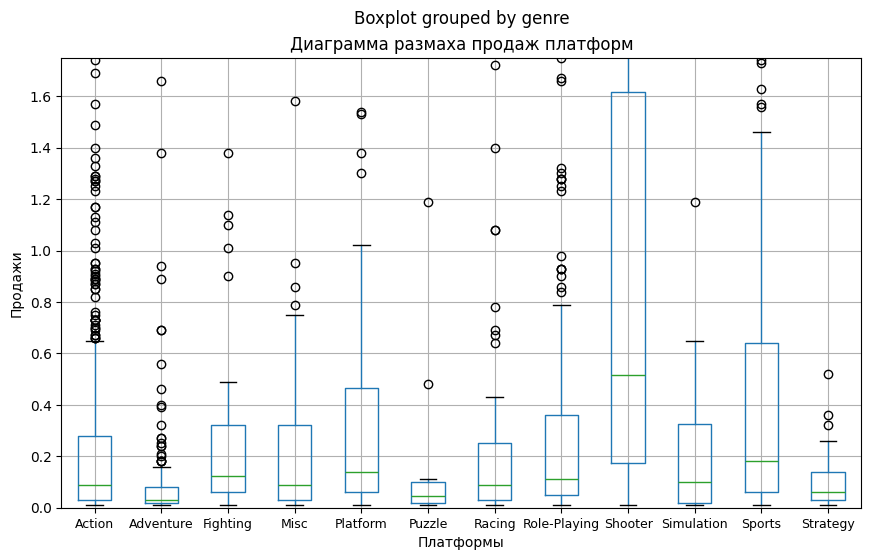

In [71]:
fig, ax = plt.subplots(figsize=(10,6))
data.boxplot(column='all_sales', by='genre', ax=ax)
ax.set_ylim(0, 1.75)
ax.set_xlabel('Платформы')
ax.set_ylabel('Продажи')
ax.set_title('Диаграмма размаха продаж платформ')
ax.tick_params('x', labelsize=9)
plt.show()

Оценим нижнюю границу длины ряда для игр.

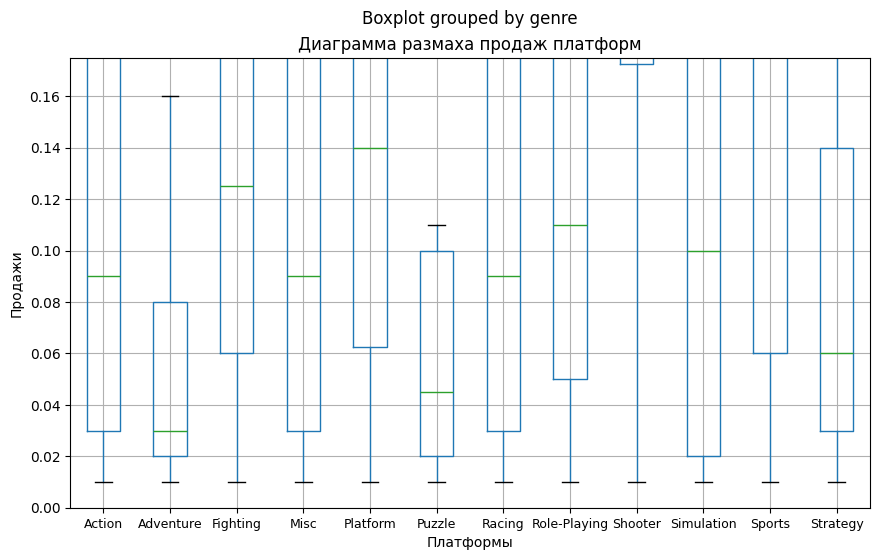

In [72]:
fig, ax = plt.subplots(figsize=(10,6))
data.boxplot(column='all_sales', by='genre', ax=ax)
ax.set_ylim(0, 0.175)
ax.set_xlabel('Платформы')
ax.set_ylabel('Продажи')
ax.set_title('Диаграмма размаха продаж платформ')
ax.tick_params('x', labelsize=9)
plt.show()

**Вывод**: изучив прибыльность жанров по диаграмме размаха можно выделить несколько с наиболее длинными рядами успешно продающихся игр по порядку: **1. Shooter, 2. Sports, 3. Platform, 4. Role-playing,** следом идут жанры с примерно одинаковыми длинами рядов : **5. Fighting, 5. misc, 5. simulation.** 

Оценим прибыльность жанров на основании медианы и расположем по порядку: **1. Shooter, 2. Sports, 3. Platform, 4. Fighting, 5. Role-playing, 6. Simulation, 7. Action.**

Выполняя сравнение медианных показателей и длины ряда успешно продающихся игр можно составить рейтинг наиболее актуальных и стабильных для рекламной кампании жанров(с указанием медианы): 
1. Shooter — 0.515;
2. Sports — 0.180;
3. Platform — 0.140;
4. Fighting — 0.125;
5. Role-playing — 0.110.
 
Жанры с высокими продажами обладают более длинным рядом успешно продающихся игр и более высоким значением медианы, относительно жанров с низкими продажами. Кроме того, наблюдается общий интерес к жанрам с более динмамичной механикой.

<a id='my_section_26'></a>
### [Заключение](#content_26)

**Вывод:**
- Оценка выпускаемых игр показала распределение игр и рост их количества от порядка 9 в 1990 году до порядка 1400 в 2008-2009 годах, далее пошёл спад. Поиск закономерностей определяющих успешность игры побудили к поиску наиболее популярных платформ. В ходе которого было выявлено десять платформ с наибольшими суммарными продажами:
    1. PS2;
    2. X360;
    3. PS3;
    4. Wii;
    5. DS;
    6. PS4;
    7. GBA;
    8. PSP;
    9. 3DS;
    10. XB.
 
- Рассчёт периода появления и исчезновение популярных платформ можно оценить в 5 и 2 года соответственно. Время существования одной платформы может варироваться от 3 до 31 года, медианной же время существования равно 10.5 лет. Также можно сделать вывод, судя по графикам, что в большинстве случаев падение продаж платформы начинается после прохождения половины жизненного цикла.

- Основываясь на графиках актуальности платформ, статистических данных, был выбран период, который позволит построить прогноз на 2017 год. Актуальным периодом для дальнейшей работы с данными выбраны 2014-2016 года. 

- Были определены платформы, находящиеся в лидерах по продажам:
    1. PS4;
    2. XOne;
    3. 3DS;
    4. PC;
    5. WiiU.
   
  Все платформы, которые рассмотрены, имеют динамику падения продаж за 2014-2015 год.
   
- Были построены диаграммы размаха по глобальным продажам игр в разбивке по платформам. Эти диаграммы позволили выявить общую тенденцию популярности игр для каждой платформы. Самыми насыщенными успешными играми, оказались платформы:
    1. PS4;
    2. XOne;
    3. 3DS;
    4. PC;
    5. WiiU.


- Проведён анализ взаимосвязи отзывов и популярности продуктов, где выявлено, что есть зависимость между влиянием оценкой `критиков` и продажами. Медианное значение корреляции равно `0.39`, а если рассматривать интересующие нас платформы:
    1. PS4 – 0.4;
    2. XOne – 0.42;
    3. 3DS – 0.28;
    4. PC – 0.17;
    5. WiiU – 0.38.

  Корреляция продаж с оценкой `пользователей` не так однозначна. Для платформы `WiiU` взаимосвязь с отзывами пользователей(`0.41`) более заметна, чем с критиками(`0.38`). `3DS` имеет примерно одинаковые значения. Остальные платформы более-менее придерживаются значения медианы (`0.09`):
    1. PS4 – -0.04;
    2. XOne – -0.09.
    3. 3DS – 0.28;
    4. PC – -0.09;
    5. WiiU – 0.41.

  Нельзя однозначно сказать, что влияние отзывов сказывается на продажах. Зависиость между этими характеристиками может быть обусловлена неведомыми для нас факторами. Однако, стоит обратить внимание на то, что она есть и в своём пике для интересующих нас платформ может достигать значения `0.42`.
  
- Наконец, была проведена работа по выявлению наиболее удачных жанров, среди которых(с указанием медианы по продажам):
    1. Shooter — 0.515;
    2. Sports — 0.180;
    3. Platform — 0.140;
    4. Fighting — 0.125;
    5. Role-playing — 0.110. 
    
Проведены рассчёты, определены зависимости, выявлены общие критерии популярности платформ и жанров.



<a id='my_section_27'></a>
## [Портрет пользователя каждого региона](#content_27)

В этой главе определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<a id='my_section_28'></a>
### [Самые популярные платформы](#content_28)

Сформируем список столбцов таблицы для удобства

In [73]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'all_sales'],
      dtype='object')

Определим функцию для упрощения обработки значений.

In [74]:
def top_reg(ind, reg, var = 5):
    top = data.pivot_table(index=ind, values=reg, aggfunc = 'sum')\
    .sort_values(by=reg, ascending=False) # Использование сводных таблиц для отбора значений и сортировка по убыванию
    return top[0:var] # Вывод первых 5 наиболее популярных значений

**1. Регион NA**

In [75]:
top_reg('platform', 'na_sales')

,na_sales
platform,
ps4,98.61
xone,81.27
x360,28.30
3ds,22.64
ps3,22.05


**2. Регион EU**

In [76]:
top_reg('platform', 'eu_sales')

,eu_sales
platform,
ps4,130.04
xone,46.25
ps3,25.54
pc,17.97
3ds,16.12


**3. Регион JP**

In [77]:
top_reg('platform', 'jp_sales')

,jp_sales
platform,
3ds,44.24
ps4,15.02
psv,14.54
ps3,11.22
wiiu,7.31


Сохраним значения

In [78]:
pl_na = top_reg('platform', 'na_sales').index
pl_eu = top_reg('platform', 'eu_sales').index
pl_jp = top_reg('platform', 'jp_sales').index

Определим функцию для визуализации результатов.

In [79]:
def res_plt_top(col, num=0):
    """Задача функции - построение рейтинга для
    топ 5 и остальных значений столбца.
    
    """
    def plt_top_reg(ind, reg, var = 5):
        """Функция выполняет группировку,
        затем сортирует и отбирает топ 5
        значений, а то, что не вошло в эти топ 5
        записывает общей суммой под индексом 'other'.
        Функция возвращает индексы и значения.
        
        """
        raw = data.pivot_table(index=ind, values=reg, aggfunc = 'sum')\
        .sort_values(by=reg, ascending=False) 
        top = raw[0:var]
        other = raw[var:].sum().iloc[0] 
        other = pd.DataFrame([other], columns=[reg] , index=['others'])
        top = pd.concat([top, other])
        # top = top.append(other) 
        lbl = top.index
        x = [round(i,2) for i in top[reg]]
        return x, lbl 
        
    
    #def my_fmt(x):
        #return '{:.1f}%'.format(x, total*x/100)
    
    
    region = {'na_sales':'Регион NA', 'eu_sales':'Регион EU', 'jp_sales':'Регион JP'}
    columns = {'platform': 'Популярные платформы', 'genre': 'Популярные жанры', 'rating':'Рейтинг ESRB'}
    columns_y = {'platform': 'Платформы', 'genre': 'Жанры', 'rating':'Рейтинг ESRB'}
    colours = {'wii': 'C0', 'nes': 'C1', 'gb': 'C2', 'ds': 'C3', 'x360': 'C4',
               'ps3': 'C5', 'ps2': 'C6', 'snes': 'C7', 'gba': 'C8', 'ps4': 'steelblue',
               '3ds': 'orange', 'n64': 'C11', 'ps': 'C12', 'xb': 'C13', 'pc': 'C14', '2600': 'C15',
               'psp': 'C16', 'xone': 'C17', 'wiiu': 'C18', 'gc': 'C19', 'gen': 'C20', 'dc': 'C21',
               'psv': 'C22', 'sat': 'C23', 'scd': 'C24', 'ws': 'C25', 'ng': 'C26', 'tg16': 'C27',
               '3do': 'C28', 'gg': 'C29', 'pcfx': 'C30', 'others': 'darkred', 'Shooter': 'C0',
               'Action':'C1', 'Sports':'C2', 'Role-Playing':'C3', 'Racing':'C4', 'Misc':'C5',
               'Fighting':'C6', 'M':'C7', 'E':'C8', 'T':'C9', 'E10+':'C10', 'unknown':'C42'
          
              }
    
    fig, ax = plt.subplots(1, 3, figsize=(14, 5))
    fig.suptitle(columns[col], fontsize=14, fontweight='bold')

    count = 0
    for key, values in region.items():
        x, lbl = plt_top_reg(col, key)
        total = len(x)
        #ax[count].pie(x, labels = lbl, radius = 1.1, autopct=my_fmt)
        ax[count].bar(lbl, x, color=[colours[key] for key in lbl])
        ax[count].grid()
        ax[count].set_title(values)
        ax[count].tick_params('x', labelrotation = num)
        ax[count].set_xlabel(columns_y[col])
        ax[count].set_ylabel('Продажи')
        count += 1

    plt.show()    

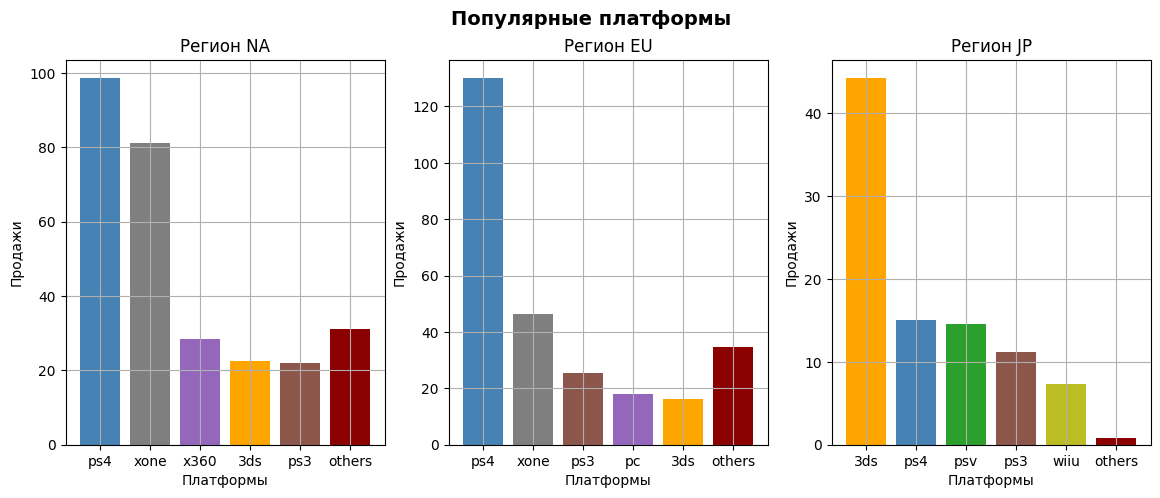

In [80]:
res_plt_top('platform')

**Вывод:** самые популярные платформы для разных регионов:
- **Регион NA:**
    1. PS4;
    2. XOne;
    3. X360;
    4. 3DS;
    5. PS3.
    
    
- **Регион EU:**
    1. PS4;
    2. XOne;
    3. PS3;
    4. PC;
    5. 3DS.
    
    
- **Регион JP:**
    1. 3DS;
    2. PS4;
    3. PSV;
    4. PS3;
    5. WiiU.

Различие по популярности платформ может быть обусловлено такими факторами, как менталитет, изначальная локализация платформы, жанры игр самой платформы. Данные по играм в каком-то смысле можно сравнить с едой, например эскимосы и чукчи могут есть китов сырыми, а большинству населения планеты, такая еда неусваиваемая и запрещенная.  

<a id='my_section_29'></a>
### [Самые популярные жанры](#content_29)

Воспользуемся кодом из прошлого пункта.

**1. Регион NA**

In [81]:
top_reg('genre', 'na_sales')

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


**2. Регион EU**

In [82]:
top_reg('genre', 'eu_sales')

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


**3. Регион JP**

In [83]:
top_reg('genre', 'jp_sales')

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


Сохраним значения

In [84]:
ge_na = top_reg('genre', 'na_sales').index
ge_eu = top_reg('genre', 'eu_sales').index
ge_jp = top_reg('genre', 'jp_sales').index

Визуализируем результаты.

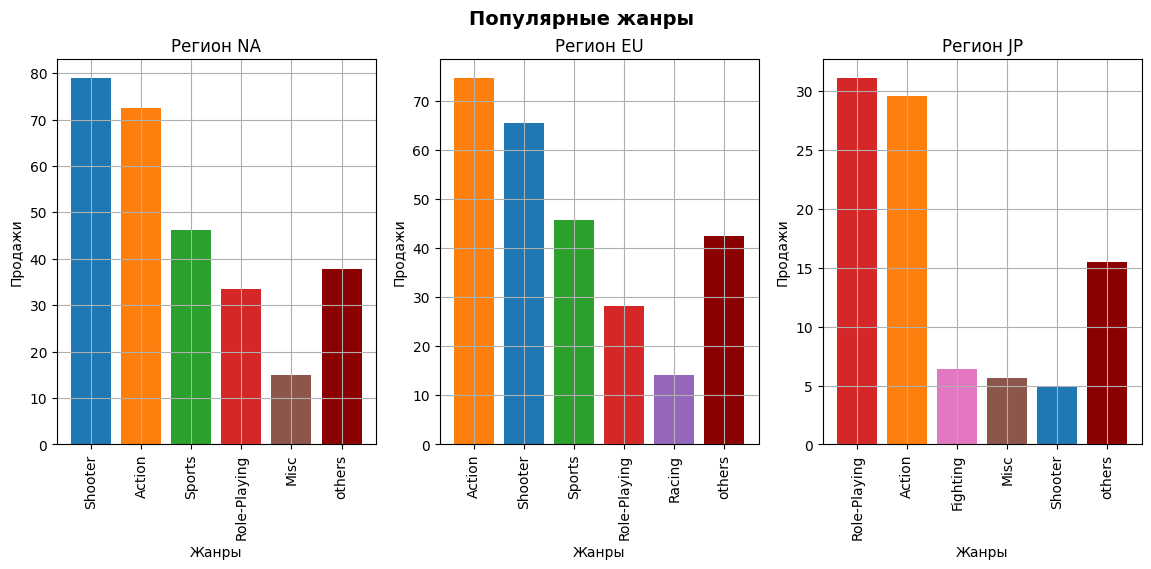

In [85]:
res_plt_top('genre', 90)

**Вывод:** Самые популярные жанры по регионам:

- **Регион NA:**
    1. Shooter;
    2. Action;
    3. Sports;
    4. Role-Playing;
    5. Misc.


- **Регион EU:**
    1. Action;
    2. Shooter;
    3. Sports;
    4. Role-Playing;
    5. Racing.


- **Регион JP:**
    1. Role-Playing;
    2. Action;
    3. Fighting;
    4. Misc;
    5. Shooter.
  
Особенно выделяется регион `JP`, согласно опросам, игроки из Японии в меньшей степени предпочитают 'PvP' `Player(s) versus player(s) или PvP (с англ. — «игрок против игрока»)` игры, гораздо больше они интересуются системой 'PvE' `Player versus environment или PvE (англ. игрок против окружения)`, опять же, вопрос от части носит культурную, духовную составляющую народа. Регионы `NA` и `UA` особых отличий не имеют, но тем не менее, то, которое есть, также обусловленно особенностями культурных слоёв/локализации продуктов.



<a id='my_section_30'></a>
### [Влияние рейтинга ESRB на продажи в регионах](#content_30)

Воспользуемся кодом из пункта 4.1. Определим рейтинг значений ESRB по продажам в разных регионах.

**1. Регион NA**

In [86]:
top_reg('rating', 'na_sales')

,na_sales
rating,
M,96.42
unknown,64.72
E,50.74
T,38.95
E10+,33.23


**2. Регион EU**

In [87]:
top_reg('rating', 'eu_sales')

,eu_sales
rating,
M,93.44
unknown,58.95
E,58.06
T,34.07
E10+,26.16


**3. Регион JP**

In [88]:
top_reg('rating', 'jp_sales')

,jp_sales
rating,
unknown,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


Сохраним значения

In [89]:
ra_na = top_reg('rating', 'na_sales').index
ra_eu = top_reg('rating', 'eu_sales').index
ra_jp = top_reg('rating', 'jp_sales').index

Визуализируем результат.

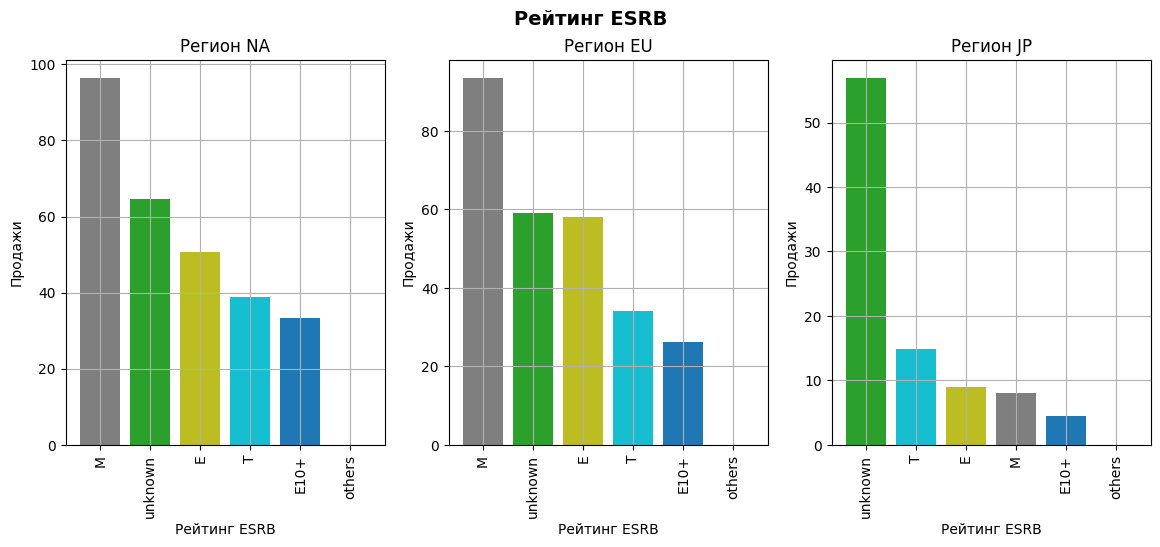

In [90]:
res_plt_top('rating', 90)

**Вывод:** Самые популярные возрастные категории по регионам:
- **Регион NA:**
    1. M;
    2. unknown;
    3. E;
    4. T;
    5. E10+.
    
    
- **Регион EU:**
    1. M;
    2. unknown;
    3. E;
    4. T;
    5. E10+.
    
    
- **Регион JP:**
    1. unknown;
    2. T;
    3. E;
    4. M;
    5. E10+.
    
    
Среди регионов, опять выделяется `JP` с категорией T на втором месте и другими отличающимися значениями рейтинга. У регионов `NA` и `EU` предпочтения одинаковые. Влияет ли рейтинг на продажи? Да, влияет, особенно, если для определённого региона поставлять соответствующие популярности возрастные категории игр.

<a id='my_section_31'></a>
### [Заключение](#content_31)

Соберём значения вместе и ещё раз вызовем для наглядности.

In [91]:
reg_NA = pd.DataFrame({'platform': pl_na, 'genre': ge_na, 'rating': ra_na})
reg_EU = pd.DataFrame({'platform': pl_eu, 'genre': ge_eu, 'rating': ra_eu})
reg_JP = pd.DataFrame({'platform': pl_jp, 'genre': ge_jp, 'rating': ra_jp})

In [92]:
reg_NA

,platform,genre,rating
0,ps4,Shooter,M
1,xone,Action,unknown
2,x360,Sports,E
3,3ds,Role-Playing,T
4,ps3,Misc,E10+


In [93]:
reg_EU

,platform,genre,rating
0,ps4,Action,M
1,xone,Shooter,unknown
2,ps3,Sports,E
3,pc,Role-Playing,T
4,3ds,Racing,E10+


In [94]:
reg_JP

,platform,genre,rating
0,3ds,Role-Playing,unknown
1,ps4,Action,T
2,psv,Fighting,E
3,ps3,Misc,M
4,wiiu,Shooter,E10+


**Вывод:**
для каждого региона характерны свои особенности, где-то отличающиеся в большую, а где-то в меньшую сторону, обусловленные локализацией продуктов, культурными, нравственными и духовными ценностями. В основном отличие составляет регион `JP`, регионы `EU` и `NA` достаточно близки, но каждый по своему уникален. Стоит обратить внимание на пропуски в столобце rating, к сожалению они составляют значительную часть и не могут быть определены. А это значит, что точная оценка регионов по этому значению будет находится под сомнением.

<a id='my_section_32'></a>
## [Проверка гипотез](#content_32)

Данная часть работы будет проведена с использование статистического анализа данных. Подвергаться сомнению будут гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем гипотезы:
1. **Xbox One и PC:**
    - H₀: средние пользовательские рейтинги платформ Xbox One и PC равны;
    - H₁: средние пользовательские рейтинги платформ Xbox One и PC  не одинаковые.
    
    
2. **Action и Sports:**
    - H₀: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые;
    - H₁: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.    

Гипотеза формируется как предположение о данных, её можно либо опровергнуть, либо не опровергнуть.
Нулевая гипотеза предполагает, что средние рейтинги одинаковые, а альтернативная, если первую опровергаем, что не одинаковые. 

Будем использовать t-критерий Стьюдента для независимых выборок, так как рейтинги одной платформы не влияют на рейтинги другой.

Воспользуемся методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: `scipy.stats.ttest_ind (array1, array2, equal_var)`

<a id='my_section_33'></a>
### [О равенстве рейтинга платформ Xbox One и PC](#content_33)

Определим уровень статистической значимости `alpha = 0.05`. Проверим гипотезу, использовав всю генеральную совокупность для платформ, потому что можем.


In [95]:
x_one = data.query('user_score >= 0').loc[data['platform'] == 'xone', 'user_score']
pc = data.query('user_score >= 0').loc[data['platform'] == 'pc', 'user_score']

print(len(x_one) == len(pc)) # Проверка равенства размера выборок

alpha = 0.05
results = sct.ttest_ind(x_one, pc) 
print('p-значение:', results.pvalue) 
# вероятность получить наблюдаемый результат при условии, что нулевая гипотеза верна

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


False
p-значение: 0.10450507919348478
Не получилось отвергнуть нулевую гипотезу


**Вывод:** не получилось отвергнуть нулевую гипотезу, т.е.: средние пользовательские рейтинги платформ Xbox One и PC предположительно одинаковые. 

In [96]:
x_one

165      79.0
179      54.0
242      64.0
270      62.0
373      41.0
         ... 
16544    68.0
16597    60.0
16630    82.0
16643    66.0
16660    67.0
Name: user_score, Length: 165, dtype: float64

<a id='my_section_34'></a>
### [О равенстве рейтинга жанров Action и Sports](#content_34)

Определим уровень статистической значимости `alpha = 0.05`. Проверим гипотезу, использовав всю генеральную совокупность для платформ.

In [97]:
action = data.query('user_score >= 0').loc[data['genre'] == 'Action', 'user_score']
sports = data.query('user_score >= 0').loc[data['genre'] == 'Sports', 'user_score']

print(len(action) == len(sports)) # Проверка равенства размера выборок

alpha = 0.05
results = sct.ttest_ind(action, sports, equal_var = False) 
# equal_var = False, так как выборки разного размера
print('p-значение:', results.pvalue) 
# вероятность получить наблюдаемый результат при условии, что нулевая гипотеза верна

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

False
p-значение: 1.182555038264477e-14
Отвергаем нулевую гипотезу


**Вывод:** отвергаем нулевую гипотезу, т.е.: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<a id='my_section_35'></a>
### [Заключение](#content_35)

**Вывод**: были проверены несколько гипотез, в результате теста был использован t-критерий Стьюдента для независимых выборок с уровенем статистической значимости alpha = 0.05. Проверка гипотез резюмировала:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.

<a id='my_section_36'></a>
## [Общий вывод](#content_36)

Для выполнения целей исследования, были проведены действия по подготовке, анализу и выявлению закономерностей.
1. В работе была проведена загрузка и изучение данных. Результат анализа показал, что необходимо изменить тип данных у столбцов:
    - Year_of_Release;
    - User_Score.

   Кроме того, обнаружены пропуски в столбцах, которые требуется обработать:
    - Name;
    - Year_of_Release;
    - Genre;
    - Critic_Score;
    - User_Score;
    - Rating.
    
   И наконец, привести к нижнему регистру столбцы таблицы.
   

2. Результатом выполнения пункта подготовки данных стало выполнение, определённых ранее задач. Кроме этого, были приведены к единой бальной системе столбцы `critic_score` и `user_score`. Обработан и рассшифрован в пункте 2.2.4 столбец `rating`. Посчитан и сформирован из колонок: `na_sales`, `eu_sales`, `jp_sales`, `other_sales`; столбец `all_sales`, содержащий в себе суммарной значение параметров. В результате обработки столбца `user_score` были выявлены пропуски: `tbd` - To Be Determined (будет определено) или To Be Decided (будет решено), `nan`. Эти пропуски были заменены на -1. Пропуски в столбце `rating` были заменены на `unknown`. В остальном было решено заменять `nan` на -1. При проверке на идентичность пропусков, столбцы `rating`, `critic_score`, `user_score` в 6665 одинаковых ячейках обнаружили отсутствие значений, что позволяет сделать предположение, о технической ошибке, которая повлекла пустоту. Стоит обратить внимание технического отдела.


3. Проведён исследовательский анализ данных:
    - оценена выпускаемость игр по годам, определено, что данные избыточны и для дальнейшей работы требуется меньший объем данных;
    - проведена оценка и сравнение количества продаж у разных платформ, определили наиболее удачные: PS2, X360, PS3, Wii, DS, PS, GBA, PS4, PSP, PC.
    - выявлены средние показатели появления и исчезновение популярных платформ, равный 5 и 2 года соответственно. Обнаружено, что время существования одной платформы может варироваться от 3 до 31 года, медианной же время существования равно 10.5 лет. 
    - актуальным периодом для формирования прогноза, исходя из прошлых результатов и графиков были выбраны года с 2014-2016.
    - определены лидирующие по продажам платформы: `PS4`,`XOne`,`3DS`, `PC`, `WiiU`. Заметна общая тенденция снижение продаж для всех платформ.
    - построена диаграмма размаха для продаж по платформам, исходя из которой выявлены, наиболее удачные: `PS4`, `XOne`,`WiiU`.
    - проведена оценка влияния отзывов на популярность продуктов. Согласно исследованию наблюдается слабая-средняя корреляция для выбранных платформ, сделать верное утверждение, что отзывы влияют на продажи нельзя из-за возможных, сторонних факторов, которые мы можем не учитывать. Показатели корреляции для выбранных платформ:
        - `PS4` (критики — 0.4, пользователи — -0.04);
        - `XOne` (критики — 0.42, пользователи — -0.09);
        - `3DS` (критики — 0.28, пользователи — 0.28);
        - `PC` (критики — 0.17, пользователи — -0.09);
        - `WiiU` (критики — 0.38, пользователи — 0.41).
        
      Хотя медианные значения для критиков и пользователей равны 0,39 и 0,09 соответственно.
    - определены наиболее популярные жанры с точки зрения продаж:
        - Shooter;
        - Sports;
        - Platform;
        - Fighting;
        - Role-playing.
    - проведены рассчёты, определены зависимости, выявлены общие критерии популярности платформ и жанров.
    
    
4. Построены портреты пользователя каждого региона:

   **Регион NA:**
       - top_platform: PS4, XOne, X360, 3DS, PS3
       - top_genre: Shooter, Action, Sports, Role-Playing, Misc
       - top_rating: M, unknown, E, T, E10+
   
   **Регион EU:**
       - top_platform: PS4, XOne, PS3, PC, 3DS
       - top_genre: Action, Shooter, Sports, Role-Playing, Racing
       - top_rating: M, unknown, E, T, E10+
       
   **Регион JP:**
       - top_platform: 3DS, PS4, PSV, PS3, WiiU
       - top_genre: Role-Playing, Action, Fighting, Misc, Shooter
       - top_rating: unknown, T, E, M, E10+ 
       
   При формировании прогноза важно учитывать разные менталитеты. Стоит обратить внимание, что значения рейтинга(top_rating) от организации ESRB искажены в силу большого количества пропусков в этом столбце. Но, тем не менее, рейтинг ESRB оказывает влияние на продажи.
   
   
5. Проверены гипотезы:
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - средние пользовательские рейтинги жанров Action и Sports разные.

  В результате теста был использован t-критерий Стьюдента для независимых выборок с уровенем статистической значимости alpha = 0.05. Проверка гипотез не опровергла предположения.
    
Установлены основные параметры, выявлены закономерности для планирования рекламных кампаний на 2017 год.